In [30]:
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
warnings.filterwarnings("ignore")

<span style="font-family: 'Trebuchet MS', sans-serif;">

# Passos iniciais
</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

## DataBase
</span>

In [3]:
df = pd.read_csv(
    '../data/mall/Mall_Customers.csv',
    sep = ',', encoding = 'iso-8859-1'
)

In [4]:
df.shape

(2000, 5)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Atributos do DataFrame

- **CustomerID:** identificação do cliente.

- **Genre:** Gênero.

- **Age:** Idade.

- **Annual Income (k$):**	Rendimento anual.

- **Spending Score (1 a 100):** Pontuação de gastos.

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análise Gráfica dos atributos
</span>

**Idade**

In [6]:
colors = px.colors.qualitative.Dark24_r
hist = px.histogram(
    df, x='Age', nbins=60, 
    labels={'Age': 'Idade', 'count': 'Número de Pessoas'},
    title='Distribuição das Idades',
    color_discrete_sequence=[colors[0]]
)
hist.update_layout(
    width=600, height=400, 
    xaxis_title='Idade',
    yaxis_title='Número de Pessoas',
    title_x=0.5, 
    margin=dict(l=50, r=50, t=50, b=50),
)
hist.show()

**Gênero**

In [7]:
df['Genre'].value_counts()

Genre
Female    1115
Male       885
Name: count, dtype: int64

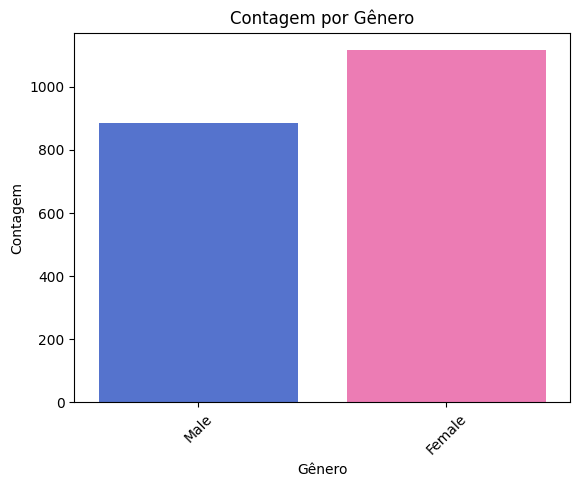

In [8]:
colors = {'Female': 'hotpink', 'Male': 'royalblue'}
sns.countplot(x='Genre', data=df, palette=colors)
plt.title('Contagem por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Exploração e tratamento dos dados

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Alterando nomes das colunas
</span>

In [9]:
df.rename(
    columns = {'CustomerID': 'ID'},
    inplace = True
)
df.rename(
    columns = {'Genre': 'genero'},
    inplace = True
)
df.rename(
    columns = {'Age': 'idade'},
    inplace = True
)
df.rename(
    columns = {'Annual Income (k$)': 'rendimento'},
    inplace = True
)
df.rename(
    columns = {'Spending Score (1-100)': 'pontuacao'},
    inplace = True
)

In [10]:
df.head(3)

,ID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análises

</span>

**Valores Missing**

In [11]:
df.isnull().sum()

ID            0
genero        0
idade         0
rendimento    0
pontuacao     0
dtype: int64

**Tipos de atributos**

In [12]:
df.dtypes

ID             int64
genero        object
idade          int64
rendimento     int64
pontuacao      int64
dtype: object

**Dados Estatísticos**

In [13]:
df.describe()

,ID,idade,rendimento,pontuacao
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,600.495000,35.170000,74.71650,29.722500
std,305.580406,10.520097,33.21942,25.109535
min,1.000000,18.000000,13.00000,1.000000
25%,350.750000,26.000000,46.00000,10.000000
50%,600.500000,35.000000,75.00000,11.000000
75%,850.250000,44.000000,100.00000,50.000000
max,1200.000000,70.000000,146.00000,99.000000


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análise dos Outliers
</span>

**Rendimento**

In [14]:
boxplot = px.box(
    df, y = "rendimento"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Idade**

In [15]:
boxplot = px.box(
    df, y = "idade"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Pontuação**

In [16]:
boxplot = px.box(
    df, y = "pontuacao"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Pré-processamento
</span>

**Exluir identificação do cliente**

In [17]:
df_att = df.drop(labels = 'ID', axis = 1)

In [18]:
df_att.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Transformando variáveis categóricas em numéricas (encoder manual)
</span>

In [19]:
df_att['genero'].replace({
    'Female': 0,
    'Male': 1
}, inplace = True)

In [20]:
df_att.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Escalonamento
</span>

In [21]:
scale = StandardScaler()

In [22]:
df_esc = scale.fit_transform(df_att)

In [23]:
df_esc

array([[ 1.12244688, -1.53744251, -1.7980878 ,  0.36957356],
       [ 1.12244688, -1.34728265, -1.7980878 ,  2.04266326],
       [-0.89091075, -1.44236258, -1.7679774 , -0.94499691],
       ...,
       [-0.89091075, -0.49156325,  1.6947188 , -0.74581957],
       [ 1.12244688, -1.15712278,  1.7248292 , -0.86532597],
       [-0.89091075, -1.06204285,  1.7549396 , -0.82549051]])

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif; font-weight: 100;">

# Cluster Hierárquico
O agrupamento hierárquico é uma técnica de análise de dados que visa agrupar objetos de dados em clusters ou grupos com base em sua similaridade. </br></br>



**Tipos de Agrupamento** </br>

Existem duas abordagens principais para o agrupamento hierárquico: </br>

<img src="../bases/tempia2.png" alt="Descrição da imagem" width="500">
</br>

1. **Agrupamento Aglomerativo**: </br> 

    Começa considerando cada dado como um cluster individual e, em seguida, mescla iterativamente os clusters mais similares até que todos os dados estejam em um único cluster.

2. **Agrupamento Divisivo**: </br>

    Começa com todos os dados em um único cluster e, em seguida, divide iterativamente o cluster em clusters menores. </br></br></br>

    


**Métodos de Ligação** 

Os métodos de ligação são utilizados para calcular a distância ou similaridade entre clusters durante o processo de agrupamento aglomerativo. </br>
Alguns dos métodos de ligação mais comuns incluem: </br>

<img src="../bases/tempia.png" alt="Descrição da imagem" width="500">
</br>

- **Single Linkage**: </br> 

    - Calcula a distância entre os pontos mais próximos de cada cluster.

- **Complete Linkage**: </br>

    - Calcula a distância entre os pontos mais distantes de cada cluster.

- **Average Linkage**: </br>

    - Calcula a média das distâncias entre todos os pares de pontos nos clusters.

- **Ward's Method**: </br>

    - Minimiza a variância dentro de cada cluster ao mesclar os clusters.

</br>

**Medidas de Similaridade/ Distância** </br>

Para calcular a similaridade ou distância entre objetos de dados, várias medidas podem ser utilizadas, incluindo: </br>

- **Distância Euclidiana**

- Distância de Manhattan

- Distância de Chebyshev

- Correlação de Pearson

- Correlação de Spearman

- Similaridade de Cosseno
</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Componentes Principais

</span>

In [26]:
pca = PCA(n_components = 2)

In [27]:
df_pca = pca.fit_transform(df_esc)

In [28]:
df_pca

array([[ 0.96133162, -0.38699117],
       [ 1.85106946,  0.41701816],
       [ 1.30154662, -1.46566991],
       ...,
       [-0.82746028, -1.35862001],
       [-1.88385317, -1.32332653],
       [-0.79236934, -1.87993492]])

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Dendograma
</span>

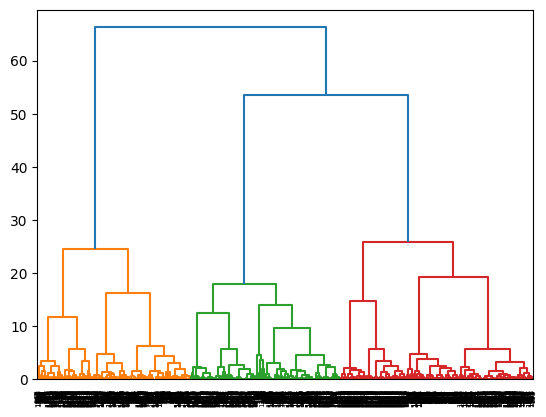

In [38]:
dendograma = dendrogram(
    linkage(
        df_pca, method = 'ward'
    )
)

In [51]:
hier = AgglomerativeClustering(
    n_clusters = 4, affinity = 'euclidean', linkage = 'complete'
)
classificacao = hier.fit_predict(df_pca)

In [52]:
classificacao

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Gráfico Scatter
</span>

In [53]:
graf = px.scatter(
    x = df_pca[:, 0], y = df_pca[:, 1],
    color = classificacao
)
graf.update_layout(width = 700, height = 400, title_text = 'Agrupamento Hierárquico')
graf.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Agrupamento -> DF
</span>

In [54]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,1
2,1
3,2
4,1
...,...
1995,3
1996,3
1997,3
1998,3


In [55]:
df2 = pd.concat([df, agrupamento], axis = 1)
df2

,ID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
1995,1196,Female,28,129,9,3
1996,1197,Male,29,130,10,3
1997,1198,Female,30,131,11,3
1998,1199,Male,23,132,8,3
